# Exploratory Data Analysis | E-Commerce Sales Analysis

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [83]:
dataset = pd.read_csv("Superstore_usa.csv")

In [84]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,28-05-2012,30-05-2012,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07-07-2010,08-07-2010,4.56,4,13.01,88522


In [85]:
dataset.shape

(9426, 24)

# Data Cleaning

In [15]:
# Remove null values

dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [ ]:
# Fill the data in Product Base Margin     72

dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)

# Data Visualization

# Order Priority

In [116]:
# counts of Order Priority

dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [117]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [118]:
dataset['Order Priority'] = dataset["Order Priority"].replace("Critical ", "Critical")

C:\Users\hp\AppData\Local\Temp\ipykernel_4468\2466985125.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Order Priority", data=dataset, palette=palette)


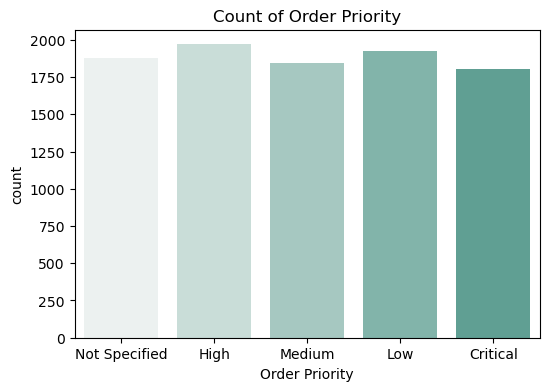

In [119]:
# Set the color palette 
palette = sns.color_palette("light:#5A9", n_colors=dataset["Order Priority"].nunique())

plt.figure(figsize=(6, 4))
plt.title("Count of Order Priority")

# Use the palette for the countplot
sns.countplot(x="Order Priority", data=dataset, palette=palette)


plt.show()

# Ship Mode

In [33]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [36]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

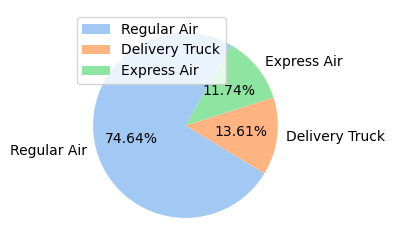

In [120]:
# Univariate Analysis

colors = sns.color_palette('pastel')
plt.figure(figsize=(4,3))
plt.pie(y, labels = x, startangle = 60, autopct="%0.2f%%", colors=colors)
plt.legend(loc=2)
plt.show()

# Product Category

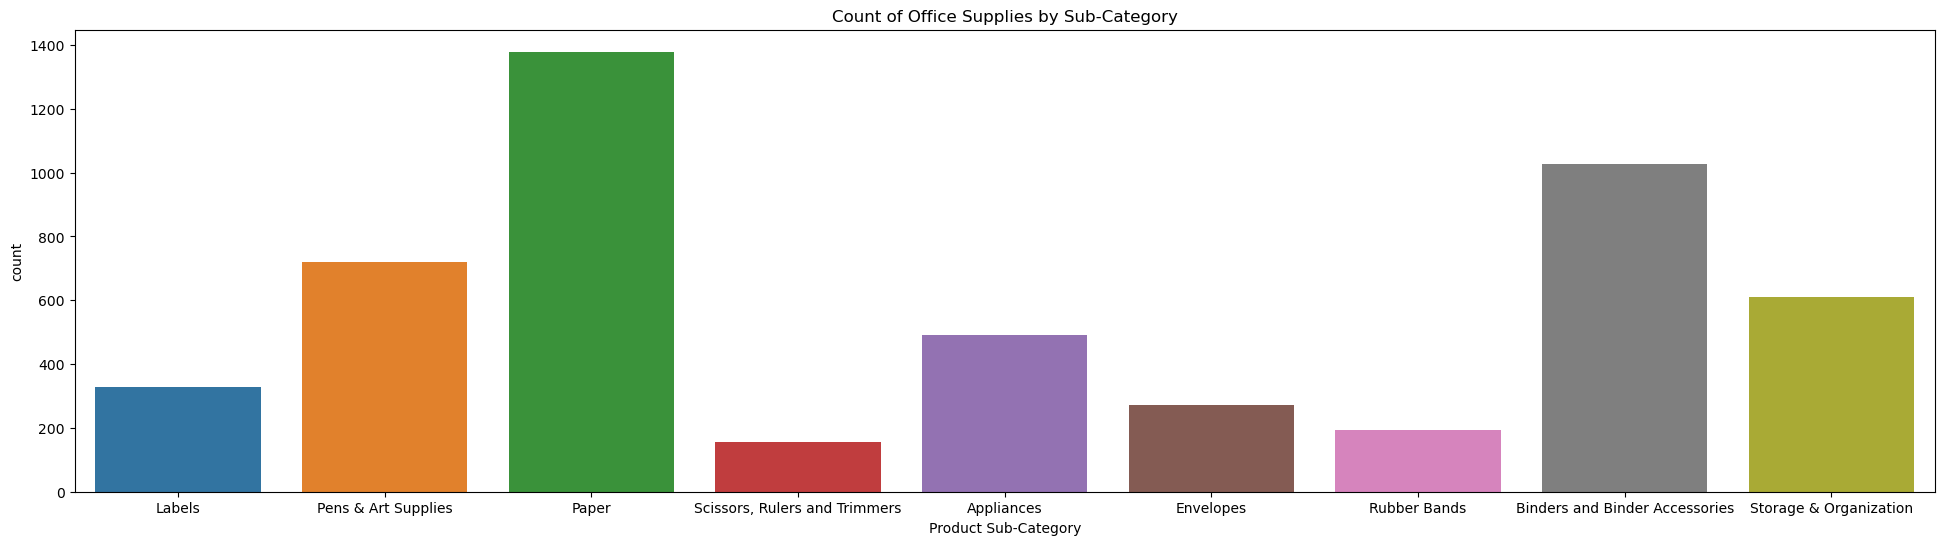

In [128]:
plt.figure(figsize=(24, 6))

filtered_data = dataset[dataset['Product Category'] == 'Office Supplies']
sns.countplot(x='Product Sub-Category', data=filtered_data, hue='Product Sub-Category')

plt.title('Count of Office Supplies by Sub-Category')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4468\3913095512.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x='Ship Mode', data = dataset, hue="Product Category", palette=palette)


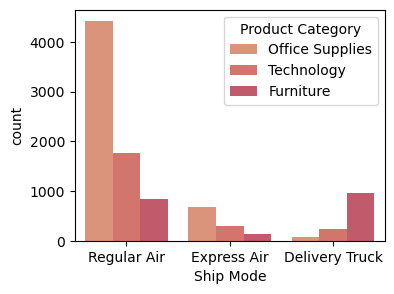

In [129]:
# Baivariate Analysis
# Product Category vs Ship Mode

palette = sns.color_palette("flare")
plt.figure(figsize=(4,3))
sns.countplot(x='Ship Mode', data = dataset, hue="Product Category", palette=palette)
plt.show()

# Customer Segment 

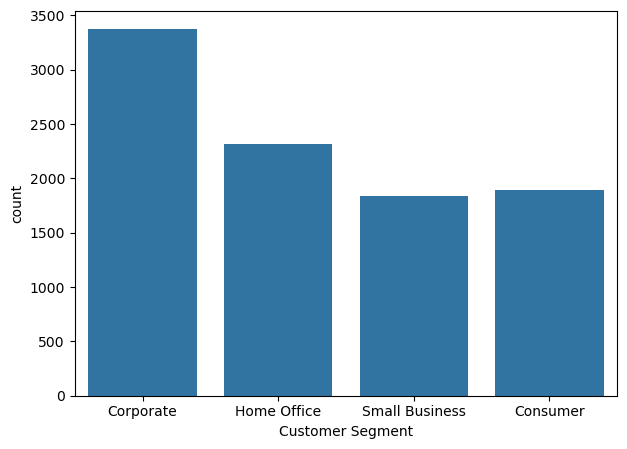

In [57]:
# Uniivariate Analysis

plt.figure(figsize=(7,5))
sns.countplot(x = 'Customer Segment', data = dataset)
plt.show()

# Order Date 

In [90]:
# dataset['Order year'] = dataset['Order Date'].dt.year

In [ ]:
# dataset.info()

In [89]:
# dataset['Order year'].value_counts()

# Profit

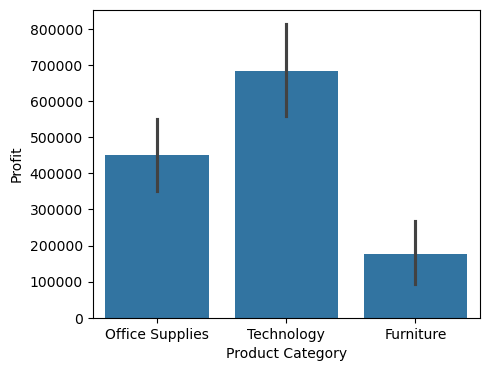

In [93]:
# baivariate Analysis

plt.figure(figsize=(5,4))
sns.barplot(x = 'Product Category', y = 'Profit', data = dataset, estimator = 'sum')
plt.show()

# State or Province

In [95]:
dataset['State or Province'].value_counts()[:5]  #Top 5

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [100]:
# Group by 'State or Province' and sum the 'Profit'

top_5_states = dataset.groupby('State or Province')['Profit'].sum().nlargest(5).reset_index()

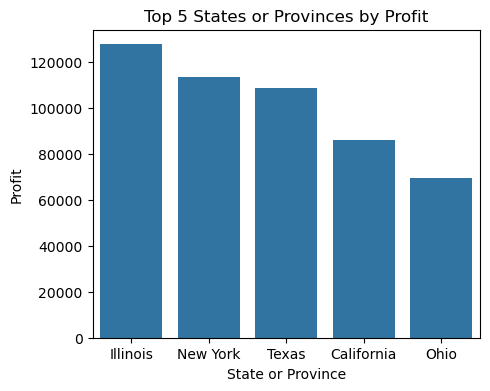

In [101]:
# baivariate Analysis

plt.figure(figsize=(5, 4))
sns.barplot(x='State or Province', y='Profit', data=top_5_states, estimator=sum)
plt.title('Top 5 States or Provinces by Profit')
plt.show()

# Product Base Margin

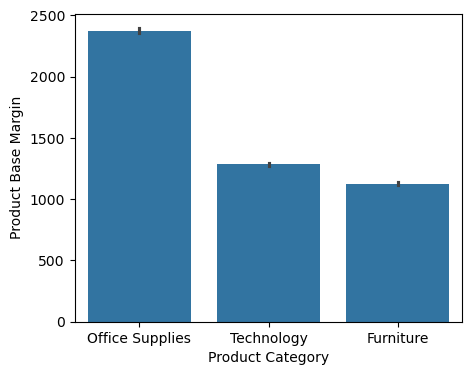

In [98]:
# baivariate Analysis

plt.figure(figsize=(5,4))
sns.barplot(x = 'Product Category', y = 'Product Base Margin', data = dataset, estimator = 'sum')
plt.show()